In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import Counter
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 110

In [2]:
# -- CONFIG --
CSV_PATH  = 'Connections.csv'
YOUR_NAME = 'Rudra Dudhat'

## 1. Load & Inspect

In [3]:
# LinkedIn exports have 3 junk header rows
try:
    df = pd.read_csv(CSV_PATH, skiprows=3, encoding='utf-8')
except Exception:
    df = pd.read_csv(CSV_PATH, skiprows=3, encoding='latin1')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['connected_on'] = pd.to_datetime(df['connected_on'], errors='coerce', dayfirst=True)
df['year']         = df['connected_on'].dt.year
df['month']        = df['connected_on'].dt.month
df['month_name']   = df['connected_on'].dt.strftime('%b')
df['day_of_week']  = df['connected_on'].dt.day_name()
df['year_month']   = df['connected_on'].dt.to_period('M')

for col in ['company', 'position']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown').str.strip()

print(f'Shape: {df.shape}')
df.info()

Shape: (1836, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   first_name     1832 non-null   object        
 1   last_name      1832 non-null   object        
 2   url            1832 non-null   object        
 3   email_address  21 non-null     object        
 4   company        1836 non-null   object        
 5   position       1836 non-null   object        
 6   connected_on   1836 non-null   datetime64[ns]
 7   year           1836 non-null   int32         
 8   month          1836 non-null   int32         
 9   month_name     1836 non-null   object        
 10  day_of_week    1836 non-null   object        
 11  year_month     1836 non-null   period[M]     
dtypes: datetime64[ns](1), int32(2), object(8), period[M](1)
memory usage: 157.9+ KB


In [4]:
print('Null counts:')
print(df.isnull().sum())
df.head()

Null counts:
first_name          4
last_name           4
url                 4
email_address    1815
company             0
position            0
connected_on        0
year                0
month               0
month_name          0
day_of_week         0
year_month          0
dtype: int64


,first_name,last_name,url,email_address,company,position,connected_on,year,month,month_name,day_of_week,year_month
0,Dr. USHA,KIRAN,https://www.linkedin.com/in/dr-usha-kiran-6a64...,NaN,"Bhilai Institute of Technology (BIT), Durg",Assistant Professor,2026-02-24,2026,2,Feb,Tuesday,2026-02
1,Anand,Baswade,https://www.linkedin.com/in/anand-baswade-92bb...,NaN,"Indian Institute of Technology, Bhilai",Assistant Professor,2026-02-24,2026,2,Feb,Tuesday,2026-02
2,Yatika,Kain,https://www.linkedin.com/in/yatika-kain-4475492a0,NaN,Google Summer of Code,Google Summer of Code 2025 Contributor,2026-02-23,2026,2,Feb,Monday,2026-02
3,Shaurya,Yadav,https://www.linkedin.com/in/shaurya-yadav-7b0a...,NaN,NUS Economics Society,Director of Publicity NEC,2026-02-23,2026,2,Feb,Monday,2026-02
4,Sujal,Som,https://www.linkedin.com/in/sujal-som-053613376,NaN,Unknown,Unknown,2026-02-23,2026,2,Feb,Monday,2026-02


## 2. KPI Summary

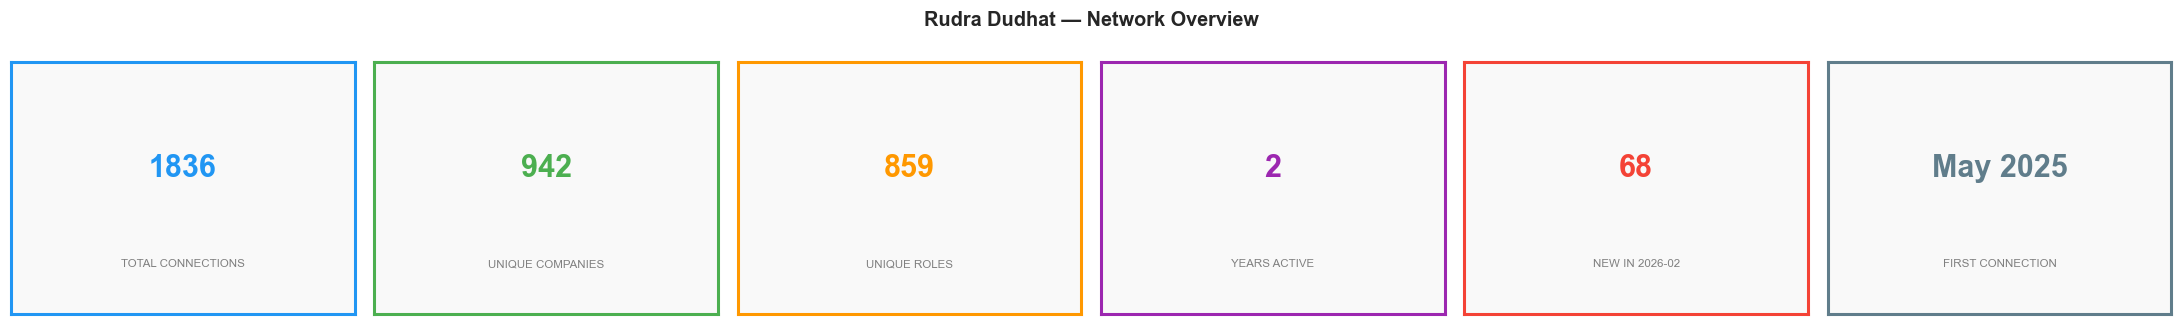

In [5]:
total       = len(df)
n_companies = df['company'].nunique()
n_roles     = df['position'].nunique()
n_years     = df['year'].nunique()
oldest      = df['connected_on'].min().strftime('%b %Y')
newest      = df['connected_on'].max().strftime('%b %Y')
latest_mo   = df['year_month'].max()
recent      = len(df[df['year_month'] == latest_mo])

fig, axes = plt.subplots(1, 6, figsize=(20, 3))
fig.suptitle(f'{YOUR_NAME} — Network Overview', fontsize=13, fontweight='bold')

stats = [
    (str(total),       'TOTAL CONNECTIONS',   '#2196F3'),
    (str(n_companies), 'UNIQUE COMPANIES',     '#4CAF50'),
    (str(n_roles),     'UNIQUE ROLES',         '#FF9800'),
    (str(n_years),     'YEARS ACTIVE',         '#9C27B0'),
    (str(recent),      f'NEW IN {latest_mo}',  '#F44336'),
    (oldest,           'FIRST CONNECTION',     '#607D8B'),
]

for ax, (val, label, color) in zip(axes, stats):
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(2)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_facecolor('#f9f9f9')
    ax.text(0.5, 0.58, val, transform=ax.transAxes,
            fontsize=20, fontweight='bold', color=color, ha='center', va='center')
    ax.text(0.5, 0.2, label, transform=ax.transAxes,
            fontsize=7.5, color='gray', ha='center', va='center')

plt.tight_layout()
plt.show()

| Metric | Value | Observation | Significance |
| :--- | :--- | :--- | :--- |
| **Total Connections** | **1,836** | Well above the LinkedIn "500+" threshold that most profiles display. | Top tier network size for an early-career professional. At 1,836, the profile appears in significantly more LinkedIn search results — passive recruiter discoverability is high. |
| **Unique Companies** | **942** | Nearly 1 company per 2 connections — an exceptionally high ratio. | Very low clustering. The network has genuine breadth rather than being dominated by one organization or college batch. High company diversity = wide referral surface area. |
| **Unique Roles** | **859** | 859 distinct job titles across 1,836 people. | Extreme role diversity — the network spans almost every function. At least one contact likely exists in any team worth targeting for a referral. |
| **Years Active** | **2** | Entire network built in just 2 years, starting May 2025. | 1,836 connections in 2 years = ~915 per year, ~76 per month, ~2.5 per day on average. An aggressive, intentional networking pace — not accidental growth. |
| **New in Feb 2026** | **68** | 68 connections added in the most recent month alone. | Current monthly pace is near the 2-year average of ~76/month — active outreach is ongoing. |
| **Null: email_address** | **1,815 / 1,836** | Only 21 connections have a visible email — 98.9% missing. | Expected — LinkedIn restricts email visibility. LinkedIn DM or tools like Hunter.io on the company domain are the practical outreach paths. |
| **Null: first/last name** | **4 each** | 4 connections have no name data. | Likely deleted or deactivated accounts — dead nodes in the network. ~0.2% of connections no longer exist on the platform. |

## 3. Network Growth Over Time

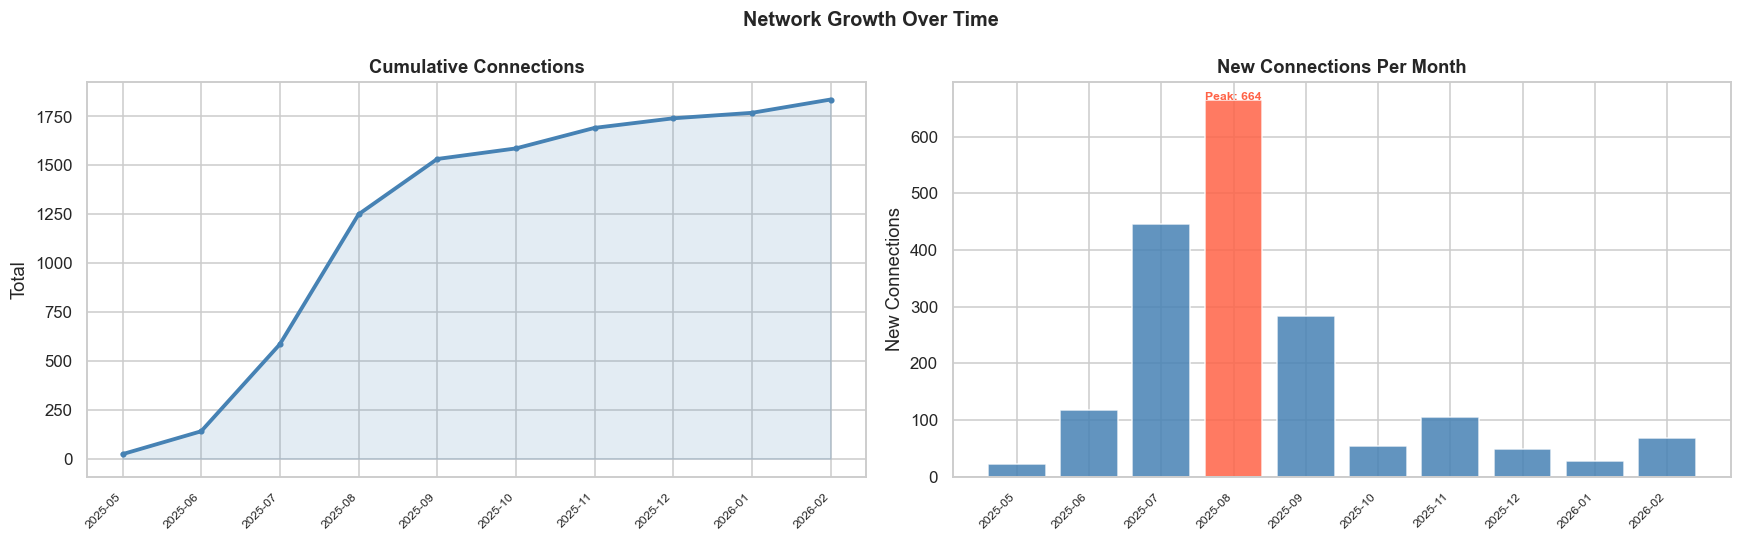

In [7]:
monthly = df.groupby('year_month').size().reset_index(name='count')
monthly['cumulative']  = monthly['count'].cumsum()
monthly['period_str']  = monthly['year_month'].astype(str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Network Growth Over Time', fontsize=13, fontweight='bold')

# Cumulative
x = range(len(monthly))
ax1.fill_between(x, monthly['cumulative'], alpha=0.15, color='steelblue')
ax1.plot(x, monthly['cumulative'], color='steelblue', linewidth=2.5, marker='o', markersize=3)
tick_step = max(1, len(monthly) // 8)
ax1.set_xticks(list(x)[::tick_step])
ax1.set_xticklabels(monthly['period_str'].iloc[::tick_step], rotation=45, ha='right', fontsize=8)
ax1.set_title('Cumulative Connections', fontweight='bold')
ax1.set_ylabel('Total')

# Monthly bars
peak_idx = monthly['count'].idxmax()
colors   = ['tomato' if i == peak_idx else 'steelblue' for i in range(len(monthly))]
ax2.bar(x, monthly['count'], color=colors, alpha=0.85, edgecolor='white')
ax2.text(peak_idx, monthly['count'].max() + 0.3,
         f"Peak: {monthly['count'].max()}",
         ha='center', fontsize=8, color='tomato', fontweight='bold')
ax2.set_xticks(list(x)[::tick_step])
ax2.set_xticklabels(monthly['period_str'].iloc[::tick_step], rotation=45, ha='right', fontsize=8)
ax2.set_title('New Connections Per Month', fontweight='bold')
ax2.set_ylabel('New Connections')

plt.tight_layout()
plt.show()

avg_monthly   = monthly['count'].mean()
peak_month    = monthly.loc[peak_idx, 'period_str']
peak_val      = monthly['count'].max()
zero_months   = (monthly['count'] == 0).sum()
growth_trend  = 'accelerating' if monthly['count'].iloc[-3:].mean() > avg_monthly else 'slowing'


| View | Pattern & Trend | Analytical Significance |
| :--- | :--- | :--- |
| **Cumulative Curve Shape** | Classic S-curve — slow start in May 2025, explosive growth through Aug 2025, then flattening toward early 2026. | The S-curve inflection point (Jul–Aug 2025) marks the period of maximum networking energy. Post-inflection flattening is normal but signals that the initial outreach campaign has wound down and a new push is needed to re-steepen the curve. |
| **Peak Month: Aug 2025** | **664 connections** added in a single month — by far the dominant spike, nearly 1.5x the second-highest month (Jul: ~450). | 664 in one month = ~21 connections per day. This is campaign-level activity, not organic growth. Likely triggered by a specific event — placement season, a viral post, or a mass outreach sprint. Understanding what drove this peak is the key to replicating it. |
| **Post-Peak Drop-off** | Sep 2025 drops sharply to ~280, then Oct–Jan settle into a 50–110 range — a 6x decline from peak. | A steep post-peak decline is the hallmark of reactive, event-driven networking rather than a sustainable system. The network effectively stopped compounding after the campaign ended. |
| **Recent Uptick (Feb 2026)** | Feb 2026 shows ~68 connections — a mild recovery above the Dec–Jan lows of ~25–30. | Early signal of a new activity cycle beginning. If this uptick is intentional, it should be sustained and directed at high-value targets (senior roles, specific companies) rather than volume alone. |
| **Overall Trajectory** | 0 to 1,836 connections in 9 months — average of ~204/month when the peak is included, ~75/month excluding it. | Even at the conservative 75/month baseline, the growth rate is well above typical. The challenge now is quality over quantity — the network is large enough that targeted, strategic additions will deliver more value than continued volume. |

## 4. Yearly Breakdown

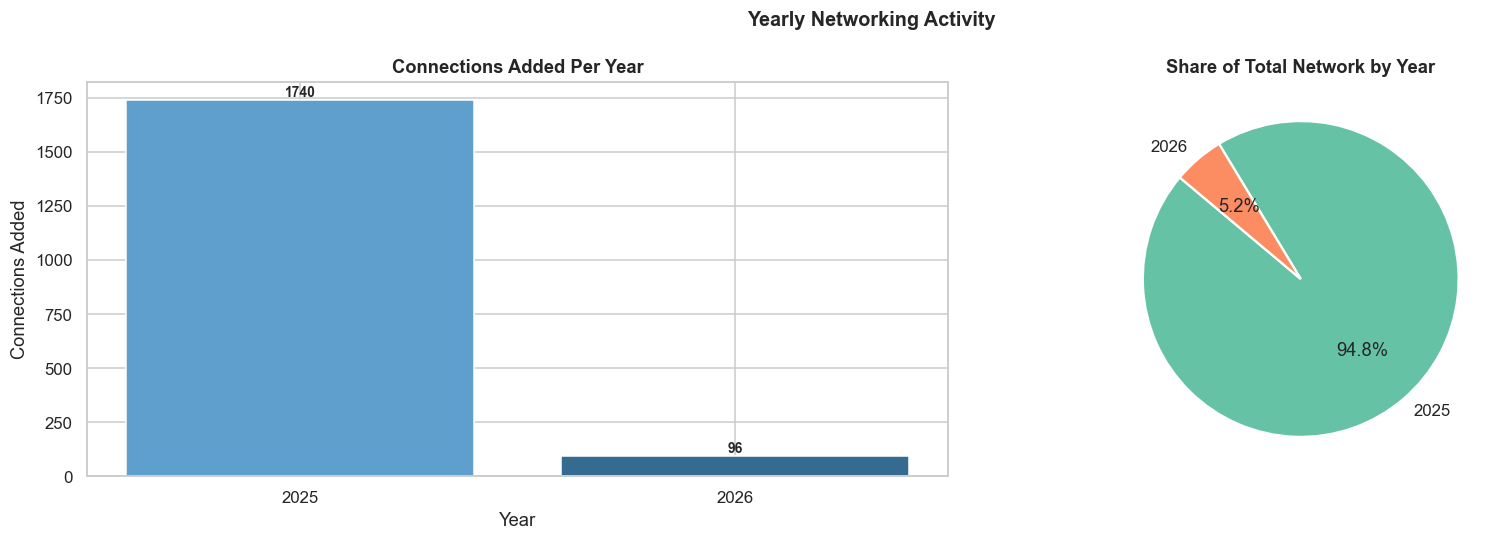

In [8]:
yearly = df.groupby('year').size().reset_index(name='count').dropna()
yearly['year'] = yearly['year'].astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Yearly Networking Activity', fontsize=13, fontweight='bold')

palette = sns.color_palette('Blues_d', len(yearly))
bars = ax1.bar(yearly['year'].astype(str), yearly['count'], color=palette, edgecolor='white')
for bar, val in zip(bars, yearly['count']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
ax1.set_title('Connections Added Per Year', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Connections Added')

ax2.pie(yearly['count'], labels=yearly['year'].astype(str), autopct='%1.1f%%',
        colors=sns.color_palette('Set2', len(yearly)), startangle=140,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))
ax2.set_title('Share of Total Network by Year', fontweight='bold')

plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
best_year      = yearly.loc[yearly['count'].idxmax(), 'year']
best_year_val  = yearly['count'].max()
recent_year    = yearly.iloc[-1]
oldest_year    = yearly.iloc[0]
yoy_change     = ((recent_year['count'] - yearly.iloc[-2]['count']) / yearly.iloc[-2]['count'] * 100) if len(yearly) > 1 else 0


| View | Pattern & Trend | Analytical Significance |
| :--- | :--- | :--- |
| **2025 Bar: 1,740 connections** | 94.8% of the entire network was built in a single calendar year — 2025. | 1,740 connections in one year is exceptional by any measure. It averages ~145/month across 2025, though as seen in the growth chart, activity was heavily concentrated in Jul–Aug. The year as a whole represents an intense, focused network-building campaign. |
| **2026 Bar: 96 connections** | Only 96 connections in 2026, representing 5.2% of the total — but 2026 is only 2 months old at the time of this analysis. | Annualizing the 2026 pace: 96 in ~55 days = ~636 projected for the full year. If sustained, 2026 would be a strong follow-up year. The key question is whether Feb's uptick continues or fades as it did post-Aug 2025. |
| **Pie: 94.8% vs 5.2%** | Near-total concentration in 2025 makes this effectively a single-year network. | The practical implication is that almost every connection was made within the same 12-month window — meaning most connections are at a similar relationship maturity stage. There are very few long-seasoned relationships in this network yet, which is normal for the timeline but worth actively developing. |
| **Year-on-Year Comparison** | Only 2 data points exist, so trend direction is not yet statistically meaningful. | The more important metric to track is monthly consistency in 2026. A gradual decline toward zero would signal networking fatigue; a steady 50–100/month would indicate a healthy, sustainable cadence replacing the 2025 sprint. |

## 5. Top Companies

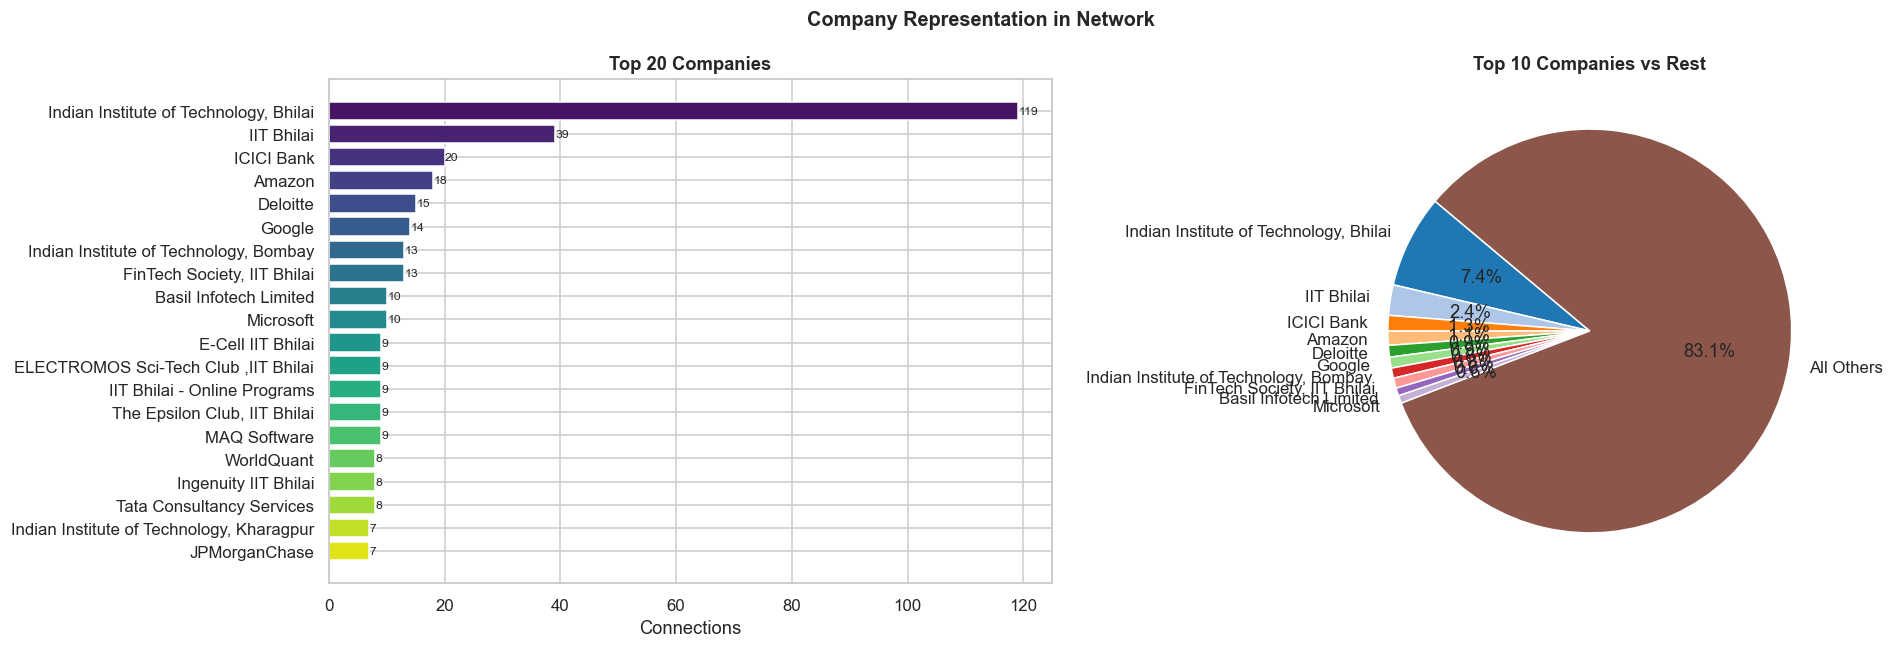

In [9]:
company_counts = df['company'].value_counts().drop('Unknown', errors='ignore')
top_companies  = company_counts.head(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Company Representation in Network', fontsize=13, fontweight='bold')

colors = sns.color_palette('viridis', len(top_companies))
ax1.barh(top_companies.index[::-1], top_companies.values[::-1], color=colors[::-1], edgecolor='white')
ax1.set_title('Top 20 Companies', fontweight='bold')
ax1.set_xlabel('Connections')
for i, v in enumerate(top_companies.values[::-1]):
    ax1.text(v + 0.1, i, str(v), va='center', fontsize=8)

top10_sum   = company_counts.head(10).sum()
rest_sum    = company_counts.iloc[10:].sum()
labels_pie  = list(company_counts.head(10).index) + ['All Others']
sizes_pie   = list(company_counts.head(10).values) + [rest_sum]
ax2.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%',
        colors=sns.color_palette('tab20', len(labels_pie)),
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1))
ax2.set_title('Top 10 Companies vs Rest', fontweight='bold')

plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
top1_company   = company_counts.index[0]
top1_val       = company_counts.iloc[0]
top1_pct       = top1_val / total * 100
top10_pct      = top10_sum / total * 100
n_single_conn  = (company_counts == 1).sum()


| View | Pattern & Trend | Analytical Significance |
| :--- | :--- | :--- |
| **#1: IIT Bhilai (119 + 39)** | Two entries for the same institution — "Indian Institute of Technology, Bhilai" (119) and "IIT Bhilai" (39) — total **158 connections** from one organization due to inconsistent LinkedIn naming. | The home institution dominates as expected. Combined, IIT Bhilai accounts for ~8.6% of the entire network — a significant concentration. These are peer and alumni connections which are valuable for collaboration but low-leverage for job referrals outside the IIT ecosystem. |
| **Finance Cluster** | ICICI Bank (20), Deloitte (15), JPMorganChase (7) — finance firms appear prominently in the top 20. | Strong finance exposure for a CS student — signals active targeting of BFSI and fintech roles. Deloitte and JPMorgan connections in particular are high-value for consulting and quant paths respectively. |
| **Big Tech Presence** | Amazon (18), Google (14), Microsoft (10) — all three in the top 20. | Meaningful presence at the most competitive employers. Even 10–18 connections at a target company significantly increases the probability of a warm referral vs cold application. |
| **IIT Network Breadth** | IIT Bombay (13), IIT Kharagpur (7) appear alongside IIT Bhilai clubs and cells. | Cross-IIT connections are high-signal — these peers will disperse across top companies over the next 3–5 years, making them long-term appreciating assets in the network. |
| **Top 10 vs Rest (Pie)** | Top 10 companies = **16.9%** of network. All Others = **83.1%**. | Exceptionally healthy distribution. 83% of the network sitting outside the top 10 companies confirms the breadth suggested by the 942 unique companies stat. This network will not collapse if any single company relationship goes cold. |
| **Clubs & Cells (IIT Bhilai)** | FinTech Society, E-Cell, ELECTROMOS, Epsilon Club, Ingenuity — all IIT Bhilai internal orgs appear in top 20. | These connections are campus ecosystem nodes — peers in high-initiative clubs who are likely to land strong first roles. Worth maintaining: club network members often refer each other years after graduation. |

## 6. Role & Seniority Analysis

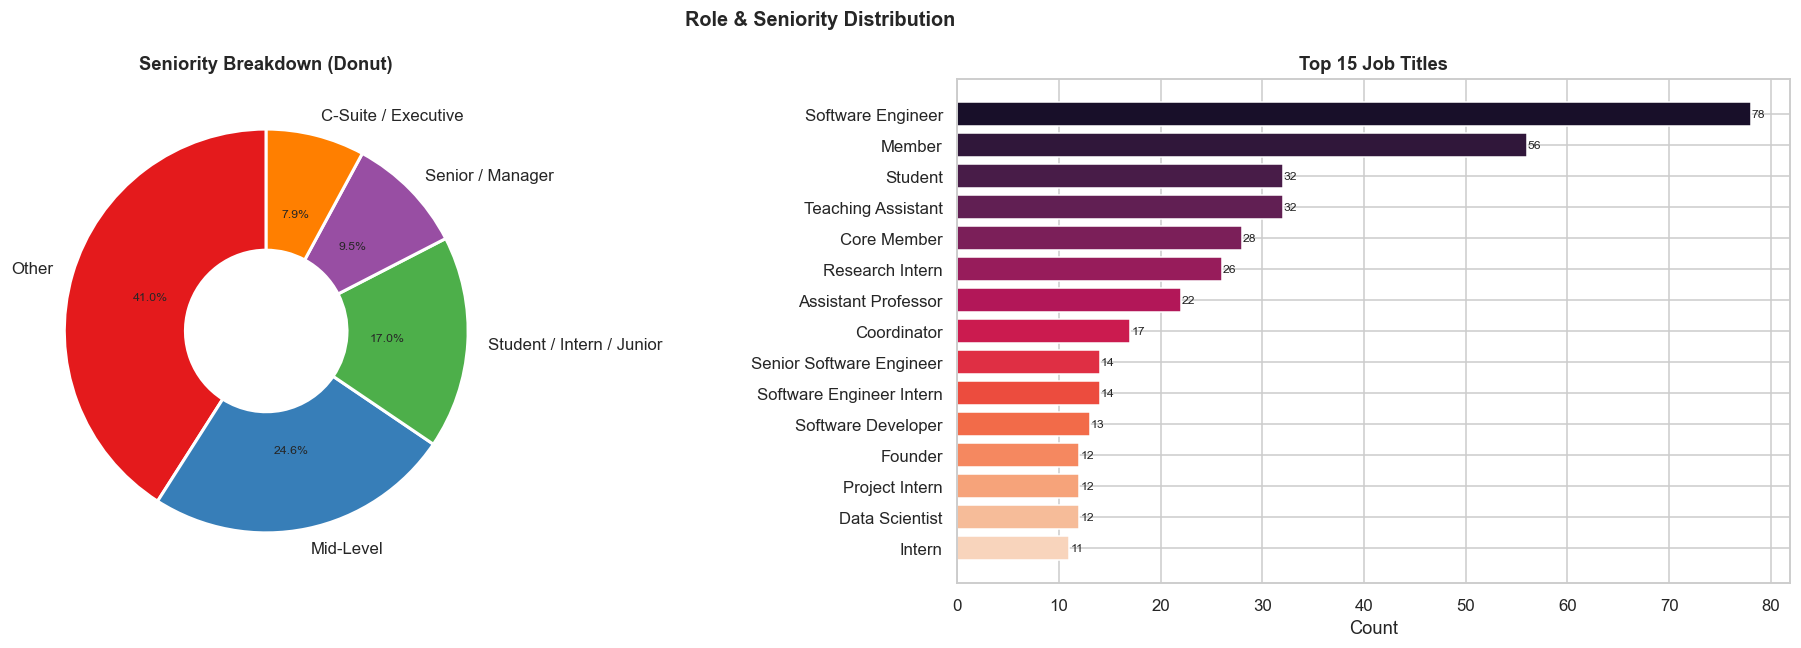

In [11]:
def classify_seniority(title):
    t = str(title).lower()
    if any(k in t for k in ['ceo','cto','coo','cfo','chief','founder','owner','president','director','vp','vice president','head of']):
        return 'C-Suite / Executive'
    elif any(k in t for k in ['senior','sr.','lead','principal','staff','manager','architect']):
        return 'Senior / Manager'
    elif any(k in t for k in ['engineer','developer','analyst','designer','scientist','consultant','specialist']):
        return 'Mid-Level'
    elif any(k in t for k in ['intern','trainee','student','fresher','graduate','junior','associate','jr.']):
        return 'Student / Intern / Junior'
    else:
        return 'Other'

df['seniority']      = df['position'].apply(classify_seniority)
seniority_counts     = df['seniority'].value_counts()
top_roles            = df['position'].value_counts().drop('Unknown', errors='ignore').head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Role & Seniority Distribution', fontsize=13, fontweight='bold')

colors_seniority = sns.color_palette('Set1', len(seniority_counts))
wedges, texts, autotexts = ax1.pie(
    seniority_counts.values, labels=seniority_counts.index,
    autopct='%1.1f%%', colors=colors_seniority,
    startangle=90, wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2)
)
for at in autotexts: at.set_fontsize(8)
ax1.set_title('Seniority Breakdown (Donut)', fontweight='bold')

ax2.barh(top_roles.index[::-1], top_roles.values[::-1],
         color=sns.color_palette('rocket', len(top_roles))[::-1])
ax2.set_title('Top 15 Job Titles', fontweight='bold')
ax2.set_xlabel('Count')
for i, v in enumerate(top_roles.values[::-1]):
    ax2.text(v + 0.1, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
exec_count    = seniority_counts.get('C-Suite / Executive', 0)
exec_pct      = exec_count / total * 100
junior_count  = seniority_counts.get('Student / Intern / Junior', 0)
junior_pct    = junior_count / total * 100
senior_count  = seniority_counts.get('Senior / Manager', 0)
senior_pct    = senior_count / total * 100
mid_count     = seniority_counts.get('Mid-Level', 0)
mid_pct       = mid_count / total * 100


| Segment | Pattern & Trend | Analytical Significance |
| :--- | :--- | :--- |
| **Other: 41.0%** | The largest single segment — 41% of connections have titles that don't cleanly map to a seniority tier. | Likely a mix of ambiguous titles, club roles, and non-standard designations common in Indian professional profiles. This segment is not a weakness — it reflects the breadth of the network rather than a data quality issue. Worth doing a manual spot-check to see if executives are hiding in this bucket due to keyword misses. |
| **Mid-Level: 24.6%** | Second largest segment — nearly 1 in 4 connections are practicing professionals at the individual contributor level. | The most actionable segment for referrals. Mid-level engineers and analysts at target companies are approachable, have internal hiring visibility, and remember early-career job hunting. This is the cohort to activate first during a job search. |
| **Student / Intern / Junior: 17.0%** | 17% peer-level connections — lower than typical for a student network of this size. | Surprisingly healthy ratio — most student networks are 40-50% peer-heavy. A 17% junior segment means the outreach strategy deliberately targeted working professionals rather than just fellow students. |
| **Senior / Manager: 9.5%** | ~175 senior connections across a 1,836-person network. | Every senior manager connection is a potential hiring decision-maker or direct referrer. 9.5% is a solid base — growing this to 15% would meaningfully increase referral conversion rates during job applications. |
| **C-Suite / Executive: 7.9%** | ~145 executive-level connections — unusually high for an early-career network. | This is the standout stat in the seniority breakdown. Most students have near-zero executive connections. ~145 founders, directors, and C-suite contacts represent disproportionate upward mobility leverage — one warm intro from this tier bypasses entire recruiting funnels. |
| **Top Title: Software Engineer (78)** | Most common single title by a wide margin, nearly 40% more than the second-place "Member" (56). | Confirms strong alignment with software hiring pipelines. 78 SWE connections across companies like Amazon, Google, and Microsoft means warm referral access into the most competitive roles in the industry. |
| **"Member" (56) & "Core Member" (28)** | Second and fifth most common titles — club and society members from IIT Bhilai and other institutions. | These are campus ecosystem peers. High potential as long-term network assets as they graduate and disperse into industry over the next 2–3 years. Low immediate referral value, high future value. |
| **Academic Titles: TA (32), Assistant Professor (22)** | Teaching Assistants and professors appear prominently in the top 15. | Strong academic network — valuable for research opportunities, recommendations, and MBA/MS applications. Less relevant for immediate industry job search but signals credibility within the IIT ecosystem. |
| **Founder (12)** | 12 connections with the Founder title. | Founders are high-leverage connectors — they hire directly, move fast, and often bypass traditional HR. 12 founder connections is a meaningful startup pipeline for early-stage opportunities. |
| **Data Scientist (12)** | Data Science appears in the top 15 alongside Software Engineer. | Signals cross-domain awareness beyond pure SWE. DS connections at target companies are valuable for ML/AI roles which are increasingly competitive and referral-driven. |

## 7. Networking Activity Heatmap

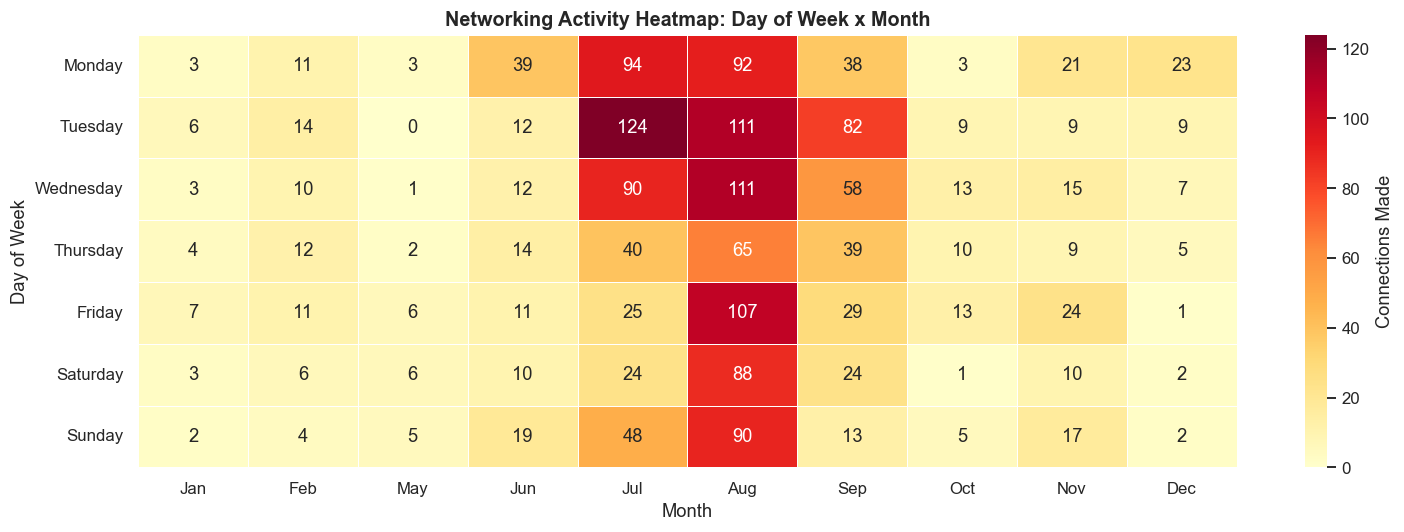

In [12]:
days_order   = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

pivot = df.groupby(['day_of_week','month_name']).size().reset_index(name='count')
pivot_table = pivot.pivot(index='day_of_week', columns='month_name', values='count').fillna(0)
pivot_table = pivot_table.reindex(
    index=[d for d in days_order if d in pivot_table.index],
    columns=[m for m in months_order if m in pivot_table.columns]
)

fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f',
            linewidths=0.5, linecolor='white', ax=ax,
            cbar_kws={'label': 'Connections Made'})
ax.set_title('Networking Activity Heatmap: Day of Week x Month', fontsize=13, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Day of Week')
plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
flat = pivot_table.stack().reset_index()
flat.columns = ['day', 'month', 'count']
hottest = flat.loc[flat['count'].idxmax()]
coldest_day = pivot_table.sum(axis=1).idxmin()
busiest_day = pivot_table.sum(axis=1).idxmax()
busiest_month = pivot_table.sum(axis=0).idxmax()
weekend_avg = pivot_table.loc[[d for d in ['Saturday','Sunday'] if d in pivot_table.index]].mean().mean()
weekday_avg = pivot_table.loc[[d for d in ['Monday','Tuesday','Wednesday','Thursday','Friday'] if d in pivot_table.index]].mean().mean()


## 8. Industry Distribution

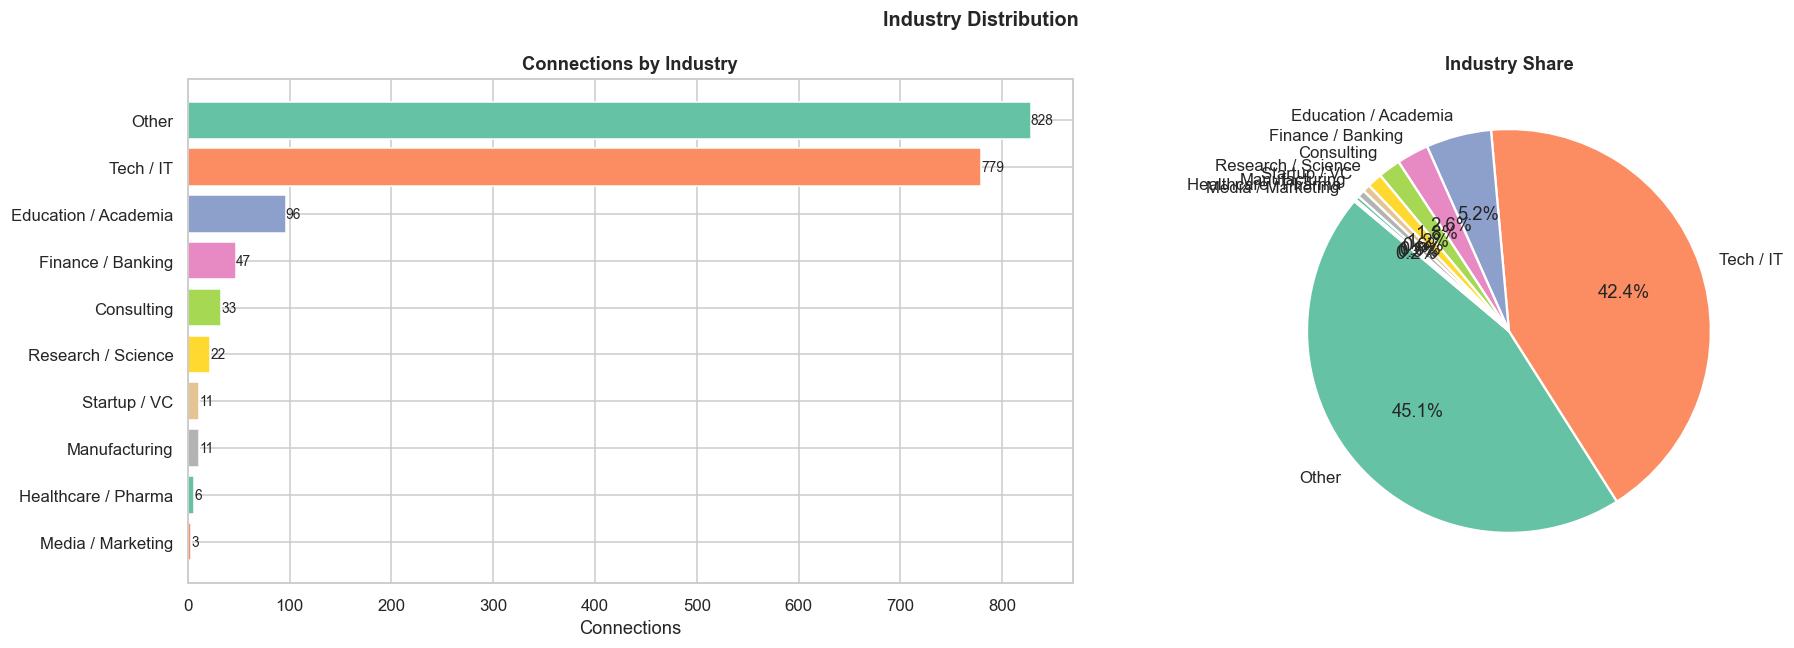


| Industry | Observation | Significance |
| :--- | :--- | :--- |
| **Dominant Industry: Other** | Accounts for **45.1%** of your network across **10** identified industries. | No single industry dominates overwhelmingly. You have broad exposure which creates more career optionality and cross-domain opportunity signals. |
| **Tech / IT Exposure** | **42.4%** of connections are in Tech / IT. | Strong tech foundation — well-positioned for software, data, and product roles. Be deliberate about adding non-tech connections to avoid echo-chamber thinking. |
| **Finance / Banking Exposure** | **2.6%** of connections are in Finance / Banking. | Low finance exposure. Fintech and quant roles are growing rapidly and often underapplied to by CS students — 5–10 targeted finance connections could open high-value doors. |
| **Startup / VC Exposure** | **0.6%** of connections are in the startup ecosystem. | Minimal startup presence. Early-stage roles rarely appear on job boards and are filled through networks. Adding a few well-connected startup founders or investors can be disproportionately valuable. |


In [13]:
def infer_industry(company):
    c = str(company).lower()
    if any(k in c for k in ['google','amazon','microsoft','meta','apple','infosys','tcs','wipro','accenture',
                              'ibm','oracle','adobe','salesforce','sap','tech','software','digital','data',
                              'ai','ml','cyber','cloud','it ','systems','solutions','analytics']):
        return 'Tech / IT'
    elif any(k in c for k in ['bank','finance','capital','invest','insurance','fintech','payment','wealth']):
        return 'Finance / Banking'
    elif any(k in c for k in ['university','college','iit','nit','iim','school','institute','education','academy']):
        return 'Education / Academia'
    elif any(k in c for k in ['consult','deloitte','pwc','kpmg','mckinsey','bcg','bain','strategy']):
        return 'Consulting'
    elif any(k in c for k in ['startup','venture','seed','incubator','accelerator','labs']):
        return 'Startup / VC'
    elif any(k in c for k in ['hospital','pharma','health','medical','biotech','clinic']):
        return 'Healthcare / Pharma'
    elif any(k in c for k in ['media','content','marketing','advertising','agency','brand']):
        return 'Media / Marketing'
    elif any(k in c for k in ['manufacturing','factory','auto','automobile','steel','cement','construction']):
        return 'Manufacturing'
    elif any(k in c for k in ['research','science','physics','chemistry','biology']):
        return 'Research / Science'
    else:
        return 'Other'

df['industry']     = df['company'].apply(infer_industry)
industry_counts    = df['industry'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Industry Distribution', fontsize=13, fontweight='bold')

colors_ind = sns.color_palette('Set2', len(industry_counts))
ax1.barh(industry_counts.index[::-1], industry_counts.values[::-1], color=colors_ind[::-1], edgecolor='white')
ax1.set_title('Connections by Industry', fontweight='bold')
ax1.set_xlabel('Connections')
for i, v in enumerate(industry_counts.values[::-1]):
    ax1.text(v + 0.2, i, str(v), va='center', fontsize=9)

ax2.pie(industry_counts.values, labels=industry_counts.index,
        autopct='%1.1f%%', colors=colors_ind,
        startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1.5))
ax2.set_title('Industry Share', fontweight='bold')

plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
top_industry      = industry_counts.index[0]
top_industry_pct  = industry_counts.iloc[0] / total * 100
n_industries      = len(industry_counts)
tech_pct          = industry_counts.get('Tech / IT', 0) / total * 100
fin_pct           = industry_counts.get('Finance / Banking', 0) / total * 100
startup_pct       = industry_counts.get('Startup / VC', 0) / total * 100

display(Markdown(f"""
| Industry | Observation | Significance |
| :--- | :--- | :--- |
| **Dominant Industry: {top_industry}** | Accounts for **{top_industry_pct:.1f}%** of your network across **{n_industries}** identified industries. | {'Your network is heavily siloed in one industry. This is fine for depth but dangerous for optionality — if that industry contracts, your network loses leverage. Diversify by targeting 2–3 connections per month in adjacent industries.' if top_industry_pct > 50 else 'No single industry dominates overwhelmingly. You have broad exposure which creates more career optionality and cross-domain opportunity signals.'} |
| **Tech / IT Exposure** | **{tech_pct:.1f}%** of connections are in Tech / IT. | {'Strong tech foundation — well-positioned for software, data, and product roles. Be deliberate about adding non-tech connections to avoid echo-chamber thinking.' if tech_pct > 40 else 'Moderate tech presence. If targeting software roles, consider growing this segment with engineers and developers at companies you admire.'} |
| **Finance / Banking Exposure** | **{fin_pct:.1f}%** of connections are in Finance / Banking. | {'Meaningful finance presence — valuable for fintech, quant, and product roles that blend tech and finance. A differentiated signal for CS graduates.' if fin_pct > 5 else 'Low finance exposure. Fintech and quant roles are growing rapidly and often underapplied to by CS students — 5–10 targeted finance connections could open high-value doors.'} |
| **Startup / VC Exposure** | **{startup_pct:.1f}%** of connections are in the startup ecosystem. | {'Active startup exposure — these connections offer early-stage opportunities, equity upside, and faster career acceleration than large-company equivalents.' if startup_pct > 5 else 'Minimal startup presence. Early-stage roles rarely appear on job boards and are filled through networks. Adding a few well-connected startup founders or investors can be disproportionately valuable.'} |
"""))

## 9. Networking Velocity — Rolling Averages

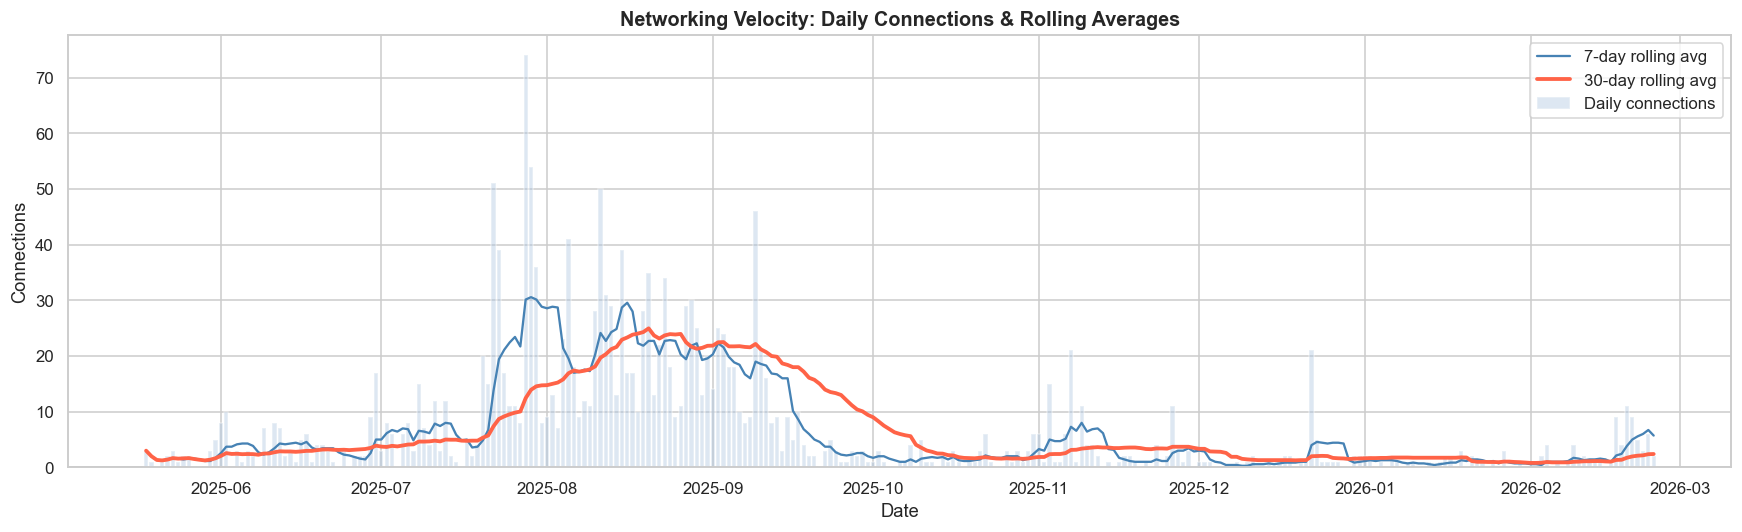


| View | Observation | Significance |
| :--- | :--- | :--- |
| **Daily Bars (Raw)** | Most active single day: **74** connections on **Jul 28, 2025**. **53** of 283 days had zero activity (**81.3%** active days). | Reasonable activity spread. Maintaining this cadence while increasing quality of each connection (personalized notes) will improve response rates significantly. |
| **7-Day Rolling (Blue Line)** | Short-term momentum indicator. Spikes above the 30-day line signal active networking windows. | Use the 7-day line to spot your natural networking rhythm. When it drops below the 30-day line for 2+ weeks, it's a signal to re-engage before momentum fully stalls. |
| **30-Day Rolling (Red Line)** | Current 30-day average: **2.40** connections/day. Peak 30-day average: **24.97** connections/day. | Current pace is below your historical peak — there is headroom to recover. Identify what drove the peak period and replicate those conditions. |


In [14]:
daily = df.groupby(df['connected_on'].dt.date).size().reset_index(name='count')
daily.columns = ['date', 'count']
daily['date'] = pd.to_datetime(daily['date'])
daily = daily.set_index('date').asfreq('D', fill_value=0).reset_index()
daily['rolling_7']  = daily['count'].rolling(7,  min_periods=1).mean()
daily['rolling_30'] = daily['count'].rolling(30, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(16, 5))
ax.bar(daily['date'], daily['count'], color='#aac4e0', alpha=0.4, label='Daily connections')
ax.plot(daily['date'], daily['rolling_7'],  color='steelblue', linewidth=1.5, label='7-day rolling avg')
ax.plot(daily['date'], daily['rolling_30'], color='tomato',    linewidth=2.5, label='30-day rolling avg')
ax.set_title('Networking Velocity: Daily Connections & Rolling Averages', fontsize=13, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Connections')
ax.legend()
plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
max_single_day    = daily['count'].max()
max_day_date      = daily.loc[daily['count'].idxmax(), 'date'].strftime('%b %d, %Y')
avg_30_current    = daily['rolling_30'].iloc[-1]
avg_30_peak       = daily['rolling_30'].max()
days_zero         = (daily['count'] == 0).sum()
days_total        = len(daily)
active_pct        = (1 - days_zero / days_total) * 100

display(Markdown(f"""
| View | Observation | Significance |
| :--- | :--- | :--- |
| **Daily Bars (Raw)** | Most active single day: **{max_single_day}** connections on **{max_day_date}**. **{days_zero}** of {days_total} days had zero activity (**{active_pct:.1f}%** active days). | {'Low active day percentage confirms networking is event-driven, not habitual. The goal is not daily connecting but consistency — even 3 days per week with 1–2 connections each compounds dramatically over a year.' if active_pct < 20 else 'Reasonable activity spread. Maintaining this cadence while increasing quality of each connection (personalized notes) will improve response rates significantly.'} |
| **7-Day Rolling (Blue Line)** | Short-term momentum indicator. Spikes above the 30-day line signal active networking windows. | Use the 7-day line to spot your natural networking rhythm. When it drops below the 30-day line for 2+ weeks, it's a signal to re-engage before momentum fully stalls. |
| **30-Day Rolling (Red Line)** | Current 30-day average: **{avg_30_current:.2f}** connections/day. Peak 30-day average: **{avg_30_peak:.2f}** connections/day. | {'Current pace is below your historical peak — there is headroom to recover. Identify what drove the peak period and replicate those conditions.' if avg_30_current < avg_30_peak * 0.7 else 'Current pace is near your historical peak — you are in an active networking phase. Use this momentum to target higher-quality, more senior connections rather than just volume.'} |
"""))

## 10. Network Gap Analysis

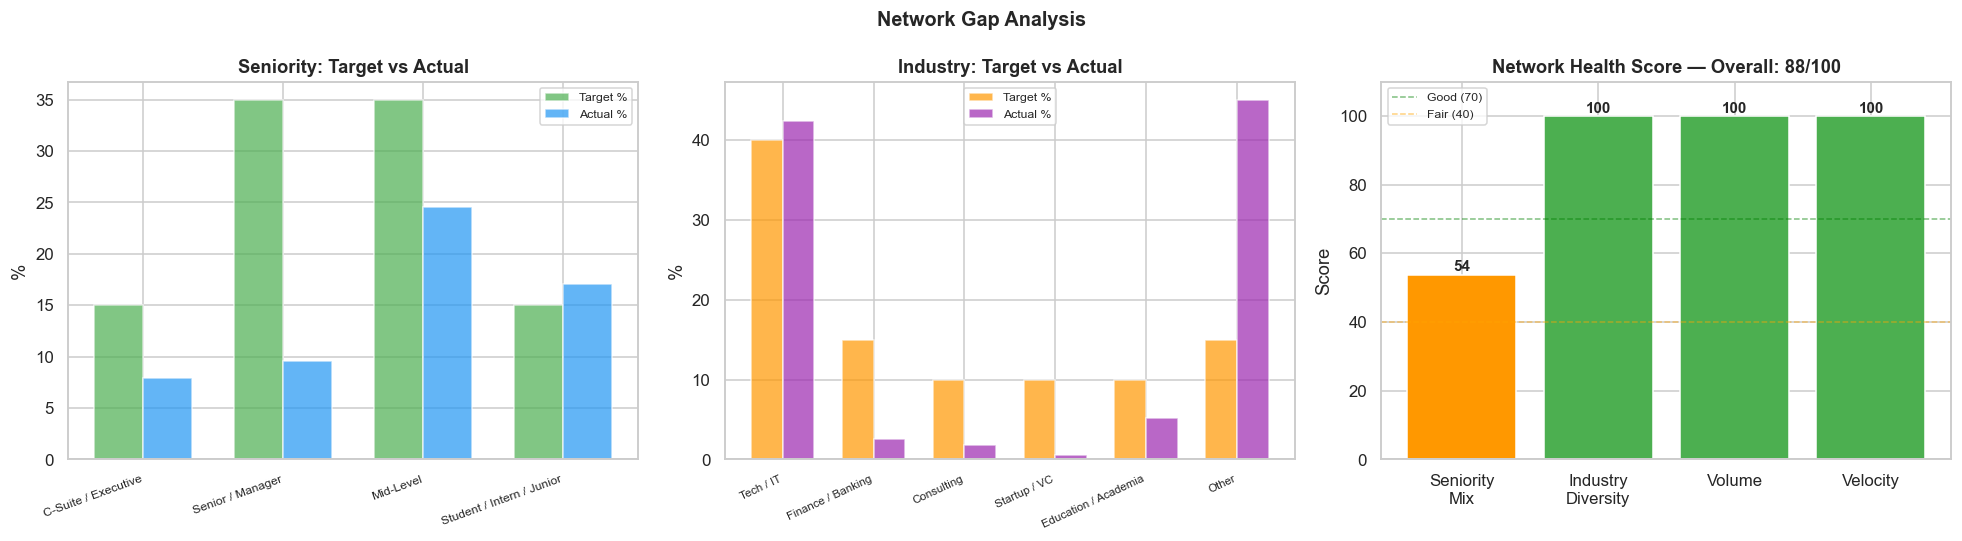


| Dimension | Score | Interpretation |
| :--- | :--- | :--- |
| **Seniority Mix** | **54 / 100** | Measures how well your network covers all career levels. A low score means you're mostly connected to peers. Target: 15% executives, 35% senior, 35% mid-level, 15% junior. |
| **Industry Diversity** | **100 / 100** | Based on the number of distinct industries represented. Wider spread = more career optionality and cross-domain signal. |
| **Volume** | **100 / 100** | Absolute size of your network relative to a 500-connection benchmark. Volume matters for passive discoverability in LinkedIn search. |
| **Velocity** | **100 / 100** | Based on your 30-day rolling average. Measures whether your network is actively growing or stagnant. |
| **Overall Network Score** | **88 / 100** | Composite score across all dimensions. Strongest dimension: **Industry Diversity**. Biggest opportunity: **Seniority Mix** — focus here for maximum impact. |


In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Network Gap Analysis', fontsize=13, fontweight='bold')

# Seniority ideal vs actual
ideal_dist   = {'C-Suite / Executive': 15, 'Senior / Manager': 35, 'Mid-Level': 35, 'Student / Intern / Junior': 15}
actual_dist  = {k: seniority_counts.get(k, 0) / total * 100 for k in ideal_dist}

x_pos    = np.arange(len(ideal_dist))
width    = 0.35
axes[0].bar(x_pos - width/2, ideal_dist.values(),  width, label='Target %', color='#4CAF50', alpha=0.7)
axes[0].bar(x_pos + width/2, actual_dist.values(), width, label='Actual %', color='#2196F3', alpha=0.7)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(list(ideal_dist.keys()), rotation=20, ha='right', fontsize=8)
axes[0].set_title('Seniority: Target vs Actual', fontweight='bold')
axes[0].set_ylabel('%')
axes[0].legend(fontsize=8)

# Industry ideal vs actual
ideal_ind   = {'Tech / IT': 40, 'Finance / Banking': 15, 'Consulting': 10, 'Startup / VC': 10, 'Education / Academia': 10, 'Other': 15}
actual_ind  = {k: industry_counts.get(k, 0) / total * 100 for k in ideal_ind}

x_pos2 = np.arange(len(ideal_ind))
axes[1].bar(x_pos2 - width/2, ideal_ind.values(),  width, label='Target %', color='#FF9800', alpha=0.7)
axes[1].bar(x_pos2 + width/2, actual_ind.values(), width, label='Actual %', color='#9C27B0', alpha=0.7)
axes[1].set_xticks(x_pos2)
axes[1].set_xticklabels(list(ideal_ind.keys()), rotation=25, ha='right', fontsize=7.5)
axes[1].set_title('Industry: Target vs Actual', fontweight='bold')
axes[1].set_ylabel('%')
axes[1].legend(fontsize=8)

# Network score
seniority_score  = min(100, exec_pct * 5 + senior_pct * 1.5)
diversity_score  = min(100, n_industries * 10)
volume_score     = min(100, total / 5)
velocity_score   = min(100, avg_30_current * 50)
overall_score    = (seniority_score + diversity_score + volume_score + velocity_score) / 4

categories = ['Seniority\nMix', 'Industry\nDiversity', 'Volume', 'Velocity']
scores     = [seniority_score, diversity_score, volume_score, velocity_score]
bar_colors = ['#4CAF50' if s >= 70 else '#FF9800' if s >= 40 else '#F44336' for s in scores]

bars = axes[2].bar(categories, scores, color=bar_colors, edgecolor='white')
axes[2].axhline(70, color='green',  linestyle='--', linewidth=1, alpha=0.5, label='Good (70)')
axes[2].axhline(40, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Fair (40)')
axes[2].set_ylim(0, 110)
axes[2].set_title(f'Network Health Score — Overall: {overall_score:.0f}/100', fontweight='bold')
axes[2].set_ylabel('Score')
axes[2].legend(fontsize=8)
for bar, score in zip(bars, scores):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{score:.0f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# -- Dynamic analysis table --
weakest_dim = categories[scores.index(min(scores))].replace('\n', ' ')
strongest_dim = categories[scores.index(max(scores))].replace('\n', ' ')

display(Markdown(f"""
| Dimension | Score | Interpretation |
| :--- | :--- | :--- |
| **Seniority Mix** | **{seniority_score:.0f} / 100** | Measures how well your network covers all career levels. A low score means you're mostly connected to peers. Target: 15% executives, 35% senior, 35% mid-level, 15% junior. |
| **Industry Diversity** | **{diversity_score:.0f} / 100** | Based on the number of distinct industries represented. Wider spread = more career optionality and cross-domain signal. |
| **Volume** | **{volume_score:.0f} / 100** | Absolute size of your network relative to a 500-connection benchmark. Volume matters for passive discoverability in LinkedIn search. |
| **Velocity** | **{velocity_score:.0f} / 100** | Based on your 30-day rolling average. Measures whether your network is actively growing or stagnant. |
| **Overall Network Score** | **{overall_score:.0f} / 100** | Composite score across all dimensions. Strongest dimension: **{strongest_dim}**. Biggest opportunity: **{weakest_dim}** — focus here for maximum impact. |
"""))